In [172]:
# random forest clasifier

In [173]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [174]:
df_stroke = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [175]:
df_stroke["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [176]:
df_stroke["ever_married"].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [177]:
# NO TO BE 0 AND YES IS 1 IN EVER_MARRIED COLUMN

def ever_married(x):
    if x=="Yes":
        return 1
    else:
        return 0

df_stroke["ever_married"]=df_stroke["ever_married"].map(ever_married)
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [178]:
df_stroke["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [179]:
df_stroke["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [180]:
#1= urban, 0=rural
def Residence_type(x):
    if x=="Urban":
        return 1
    else:
        return 0

df_stroke["Residence_type"]=df_stroke["Residence_type"].map(Residence_type)
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [181]:
df_dummies=pd.get_dummies(df_stroke)
df_dummies


,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,False,...,False,False,False,True,False,False,False,True,False,False
1,51676,61.0,0,0,1,0,202.21,NaN,1,True,...,False,False,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,1,0,105.92,32.5,1,False,...,False,False,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,1,1,171.23,34.4,1,True,...,False,False,False,True,False,False,False,False,False,True
4,1665,79.0,1,0,1,0,174.12,24.0,1,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,1,83.75,NaN,0,True,...,False,False,False,True,False,False,False,False,True,False
5106,44873,81.0,0,0,1,1,125.20,40.0,0,True,...,False,False,False,False,True,False,False,False,True,False
5107,19723,35.0,0,0,1,0,82.99,30.6,0,True,...,False,False,False,False,True,False,False,False,True,False
5108,37544,51.0,0,0,1,0,166.29,25.6,0,False,...,False,False,False,True,False,False,False,True,False,False


In [182]:
#1= true, 0=false
def gender_Female(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["gender_Female"]=df_dummies["gender_Female"].map(gender_Female)
df_dummies

def gender_Male(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["gender_Male"]=df_dummies["gender_Male"].map(gender_Male)
df_dummies
def gender_Other(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["gender_Other"]=df_dummies["gender_Other"].map(gender_Other)
df_dummies





,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,...,0,False,False,True,False,False,False,True,False,False
1,51676,61.0,0,0,1,0,202.21,NaN,1,0,...,0,False,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,...,0,False,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,1,1,171.23,34.4,1,0,...,0,False,False,True,False,False,False,False,False,True
4,1665,79.0,1,0,1,0,174.12,24.0,1,0,...,0,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,1,83.75,NaN,0,0,...,0,False,False,True,False,False,False,False,True,False
5106,44873,81.0,0,0,1,1,125.20,40.0,0,0,...,0,False,False,False,True,False,False,False,True,False
5107,19723,35.0,0,0,1,0,82.99,30.6,0,0,...,0,False,False,False,True,False,False,False,True,False
5108,37544,51.0,0,0,1,0,166.29,25.6,0,0,...,0,False,False,True,False,False,False,True,False,False


In [183]:
df_dummies = df_dummies.rename(columns={'work_type_Self-employed': 'work_type_Selfemployed'})

df_dummies = df_dummies.rename(columns={'smoking_status_never smoked': 'smoking_status_neversmoked'})
df_dummies = df_dummies.rename(columns={'smoking_status_formerly smoked': 'smoking_status_formerlysmoked'})
def work_type_Govt_job(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["work_type_Govt_job"]=df_dummies["work_type_Govt_job"].map(work_type_Govt_job)

def work_type_Never_worked(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["work_type_Never_worked"]=df_dummies["work_type_Never_worked"].map(work_type_Never_worked)

def work_type_Selfemployed(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["work_type_Selfemployed"]=df_dummies["work_type_Selfemployed"].map(work_type_Selfemployed)
def work_type_children(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["work_type_children"]=df_dummies["work_type_children"].map(work_type_children)
def work_type_Private(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["work_type_Private"]=df_dummies["work_type_Private"].map(work_type_Private)
def smoking_status_formerlysmoked(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["smoking_status_formerlysmoked"]=df_dummies["smoking_status_formerlysmoked"].map(smoking_status_formerlysmoked)

def smoking_status_Unknown(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["smoking_status_Unknown"]=df_dummies["smoking_status_Unknown"].map(smoking_status_Unknown)
def smoking_status_smokes(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["smoking_status_smokes"]=df_dummies["smoking_status_smokes"].map(smoking_status_smokes)

def smoking_status_neversmoked(x):
    if x=="true":
        return 1
    else:
        return 0

df_dummies["smoking_status_neversmoked"]=df_dummies["smoking_status_neversmoked"].map(smoking_status_neversmoked)

df_dummies



,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Selfemployed,work_type_children,smoking_status_Unknown,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,0,...,0,0,0,0,0,0,0,0,0,0
1,51676,61.0,0,0,1,0,202.21,NaN,1,0,...,0,0,0,0,0,0,0,0,0,0
2,31112,80.0,0,1,1,0,105.92,32.5,1,0,...,0,0,0,0,0,0,0,0,0,0
3,60182,49.0,0,0,1,1,171.23,34.4,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1665,79.0,1,0,1,0,174.12,24.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,1,83.75,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
5106,44873,81.0,0,0,1,1,125.20,40.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5107,19723,35.0,0,0,1,0,82.99,30.6,0,0,...,0,0,0,0,0,0,0,0,0,0
5108,37544,51.0,0,0,1,0,166.29,25.6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:

y=df_dummies["stroke"]
X=df_dummies.drop(columns=["id","stroke"])


y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [185]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Selfemployed,work_type_children,smoking_status_Unknown,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,0,0,0,0,0,0,0,0,0,0,0,0
1,61.0,0,0,1,0,202.21,NaN,0,0,0,0,0,0,0,0,0,0,0,0
2,80.0,0,1,1,0,105.92,32.5,0,0,0,0,0,0,0,0,0,0,0,0
3,49.0,0,0,1,1,171.23,34.4,0,0,0,0,0,0,0,0,0,0,0,0
4,79.0,1,0,1,0,174.12,24.0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
scaler = StandardScaler()
# Scaling the numeric attributes
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#df_dummies[['bmi', 'avg_glucose_level', 'age']] = scaler.fit_transform(df_dummies[['bmi', 'avg_glucose_level', 'age']])

# Making Predictions Using The Random Forest model

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error

# Assuming y and X are defined somewhere in your code
# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a SimpleImputer to impute missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=78)

# Train the classifier on the imputed training data
rf_classifier.fit(X_train_imputed, y_train)

# Predict on the imputed testing data
y_pred = rf_classifier.predict(X_test_imputed)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix:\n", cm_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision, recall, and F1-score on the training data
y_train_pred = rf_classifier.predict(X_train_imputed)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print ("USING X_train")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0          960            0
Actual 1           62            0
Accuracy: 0.9393346379647749
Mean Squared Error: 0.060665362035225046
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


USING X_train
Precision: 1.0
Recall: 1.0
F1-score: 1.0


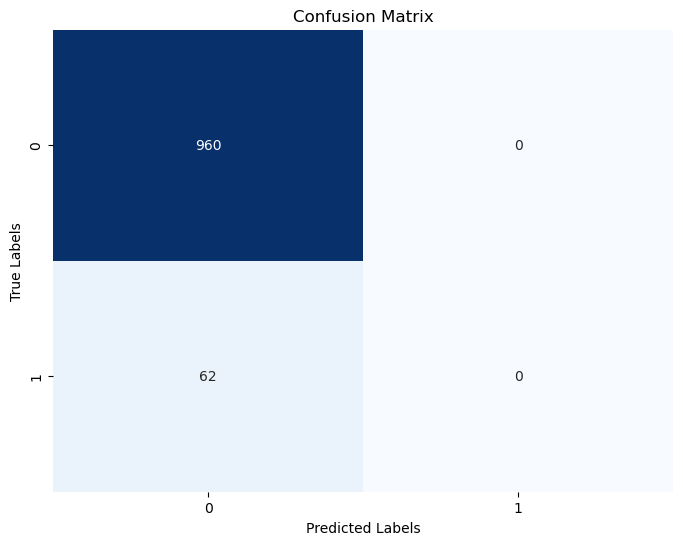

In [196]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



# Feature Importance

In [192]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_classifier.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_classifier.feature_importances_, X.columns), reverse=True)

[(0.35983154471888695, 'avg_glucose_level'),
 (0.2954771688982099, 'bmi'),
 (0.26272132967726514, 'age'),
 (0.02197443335469518, 'heart_disease'),
 (0.021635127717505778, 'hypertension'),
 (0.020776728211071276, 'Residence_type'),
 (0.01758366742236587, 'ever_married'),
 (0.0, 'work_type_children'),
 (0.0, 'work_type_Selfemployed'),
 (0.0, 'work_type_Private'),
 (0.0, 'work_type_Never_worked'),
 (0.0, 'work_type_Govt_job'),
 (0.0, 'smoking_status_smokes'),
 (0.0, 'smoking_status_neversmoked'),
 (0.0, 'smoking_status_formerlysmoked'),
 (0.0, 'smoking_status_Unknown'),
 (0.0, 'gender_Other'),
 (0.0, 'gender_Male'),
 (0.0, 'gender_Female')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

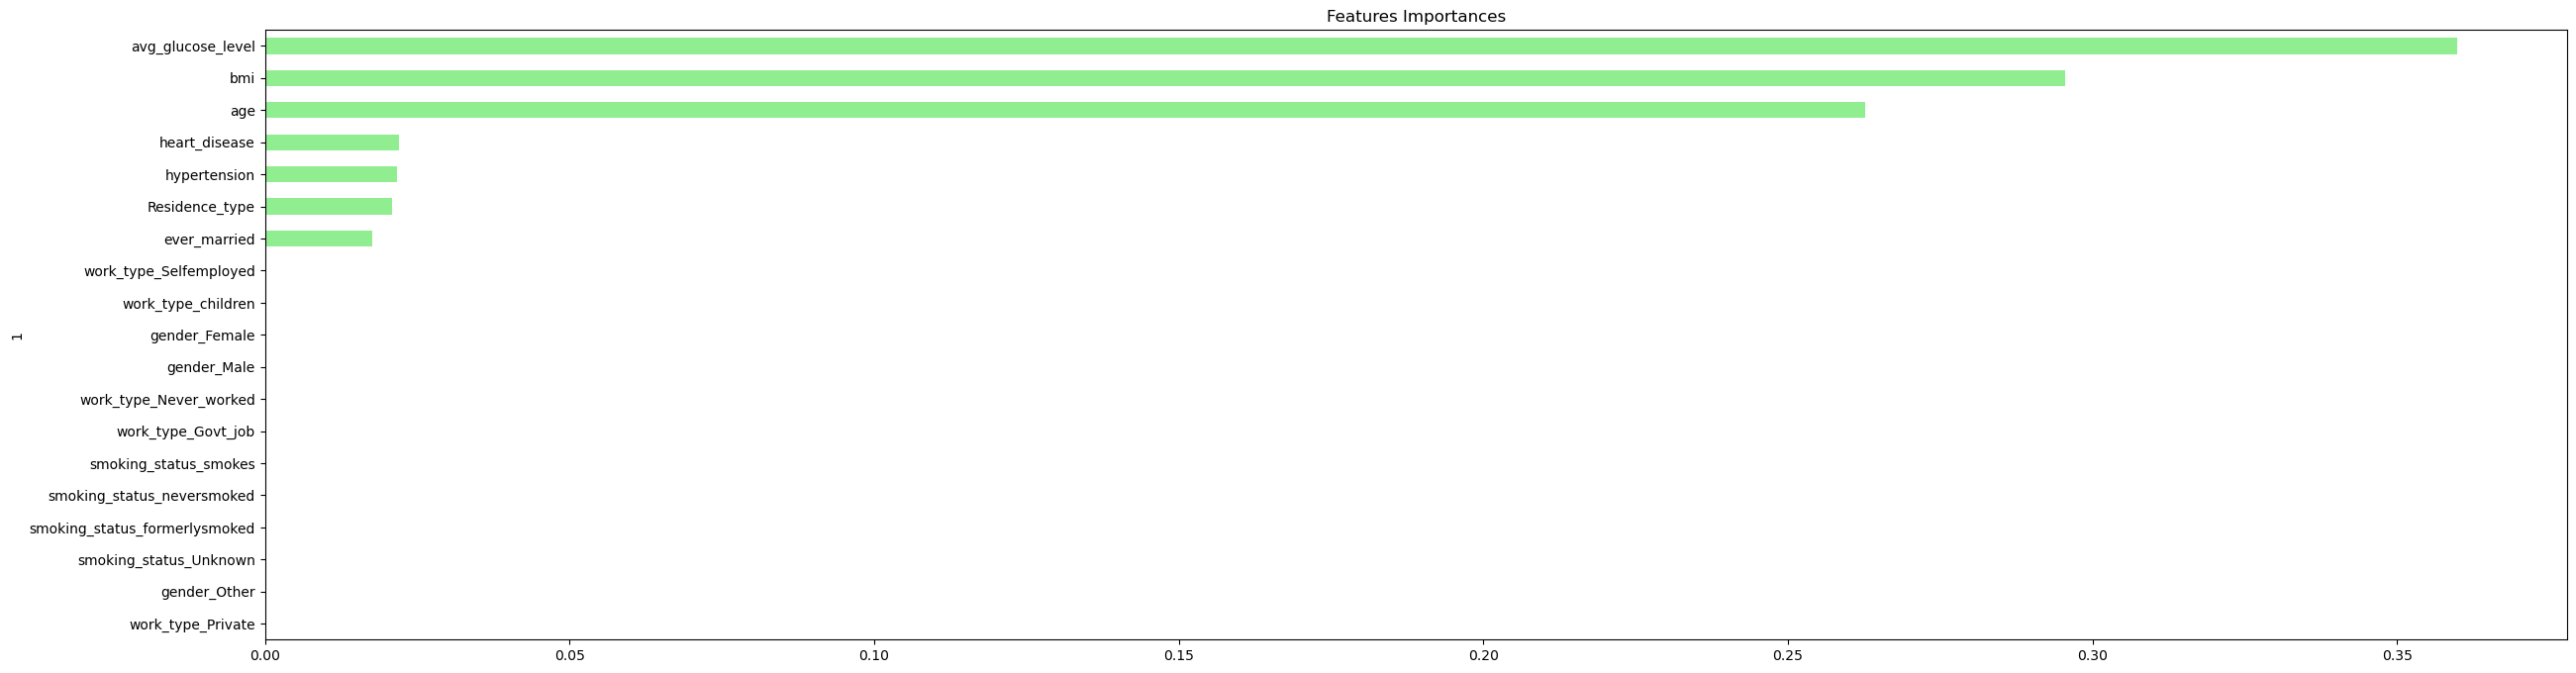

In [190]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip( rf_classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

C:\Users\swapn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\swapn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


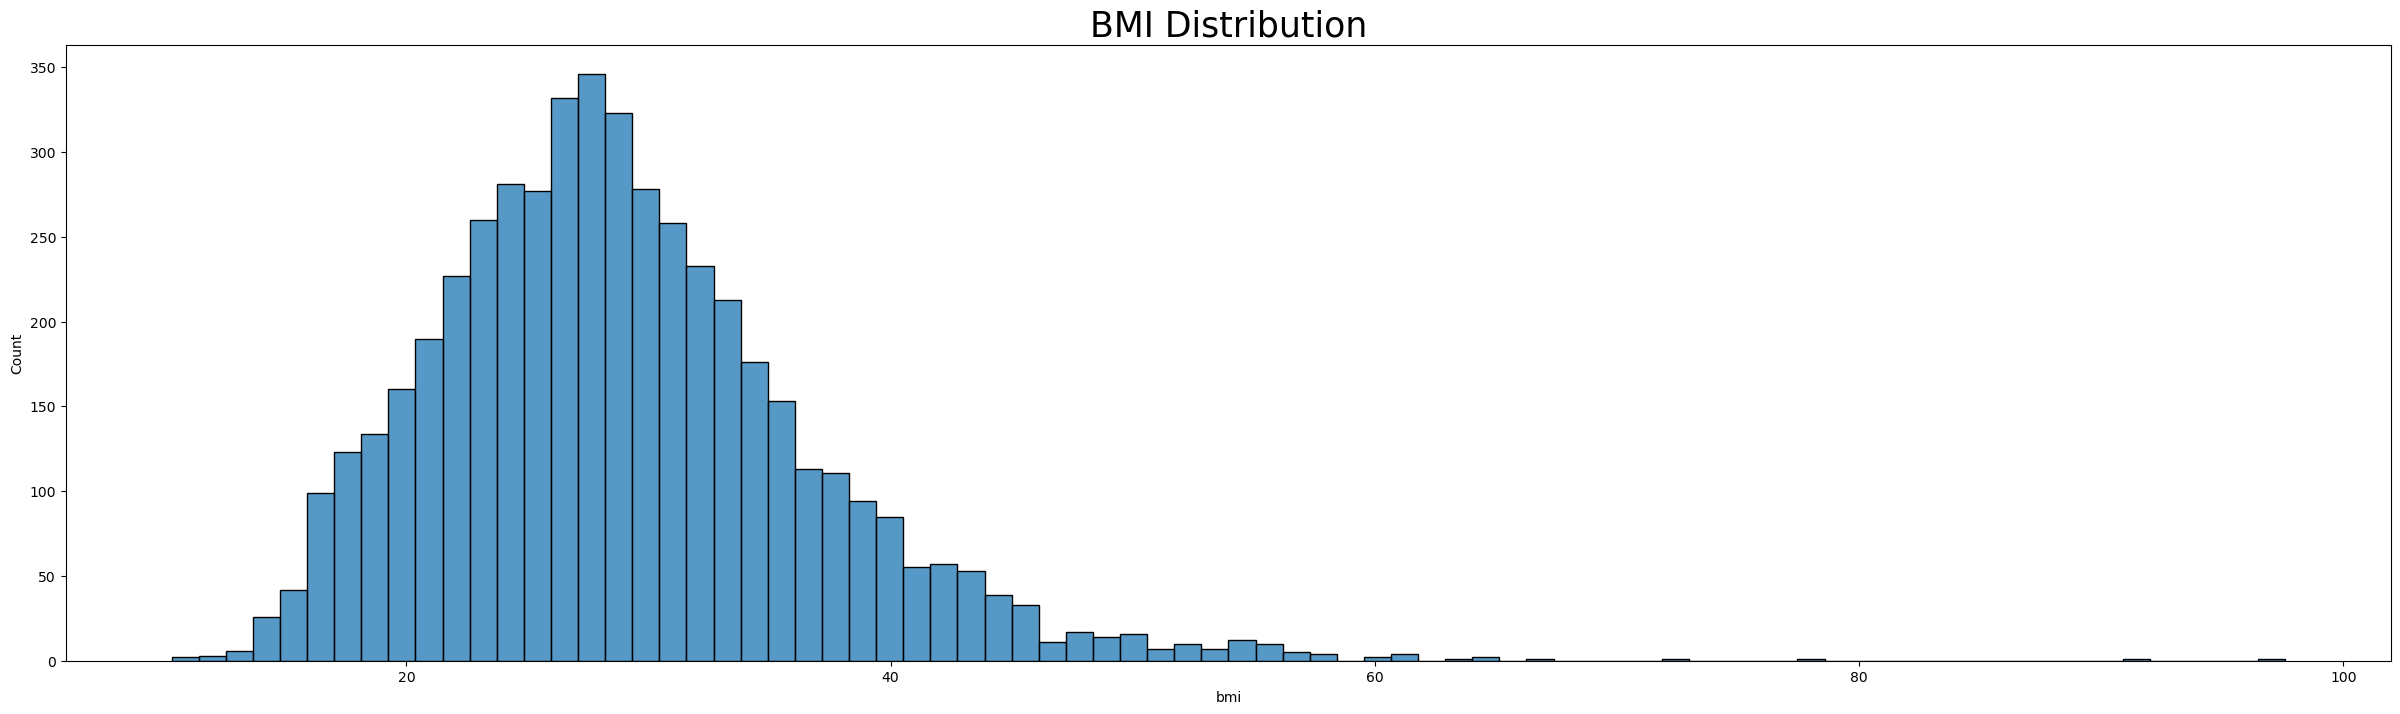

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (30, 8)

# Assuming df_dummies is your DataFrame
sns.histplot(df_dummies['bmi'])
plt.title('BMI Distribution', fontsize=25)
plt.show()
